In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 


df=pd.read_excel(r"D:\Merge file.xlsx")

In [2]:
df

Comment Reaction       Tag  \
0                          ‡¶∂‡ßá‡¶ñ ‡¶π‡¶æ‡¶∏‡¶ø‡¶®‡¶æ ‡¶ï‡¶¨‡ßá ‡¶è‡¶á ‡¶∏‡¶ø‡¶®‡ßá‡¶Æ‡¶æ ‡¶¶‡ßá‡¶ñ‡¶¨‡ßá        0  Negative   
1                                   ‡¶∂‡ßá‡¶∑  ‡¶õ‡¶¨‡¶ø  ‡¶∏‡¶æ‡¶≤‡¶Æ‡¶æ‡¶®  ‡¶∂‡¶æ‡¶π        0  Positive   
2                                  ‡¶∂‡ßá‡¶∑  ‡¶ü‡¶æ ‡¶¶‡¶æ‡¶∞‡ßÅ‡¶£ ‡¶õ‡¶ø‡¶≤ Ô∏èÔ∏èÔ∏èÔ∏è        0  Positive   
3              ‡¶∂‡ßá‡¶∑  ‡¶™‡¶∞‡ßç‡¶Ø‡¶®‡ßç‡¶§ ‡¶ï‡¶æ‡¶®‡ßç‡¶®‡¶æ ‡¶Ü‡¶∞ ‡¶ß‡¶∞‡ßá ‡¶∞‡¶æ‡¶ñ‡¶§‡ßá ‡¶™‡¶æ‡¶∞‡¶ø ‡¶®‡¶æ‡¶á‡•§        0  Positive   
4       ‡¶∂‡ßá‡¶∑ ‡ß©‡ß¶ ‡¶Æ‡¶ø‡¶®‡¶ø‡¶ü ‡¶∂‡ßÅ‡¶ß‡ßÅ‡¶á ‡¶ï‡ßá‡¶Å‡¶¶‡ßá‡¶õ‡¶ø‡•§ ‡¶¶‡ßÅ‡¶®‡¶ø‡ßü‡¶æ‡ßü ‡¶Ø‡¶æ‡¶∞ ‡¶ü‡¶æ‡¶ï‡¶æ ‡¶®...        0  Positive   
...                                                   ...      ...       ...   
122182     ‡¶õ‡ßÅ‡¶ü ‡¶¨‡ßá‡¶≤‡¶æ ‡¶¶‡ßá‡¶ñ‡ßá‡¶õ‡¶ø‡¶≤‡¶æ‡¶Æ ‡¶Ü‡¶∞ ‡¶Ü‡¶ú ‡¶¶‡ßá‡¶ñ‡¶≤‡¶æ‡¶Æ,, ‡¶Ö‡¶∏‡¶æ‡¶ß‡¶æ‡¶∞‡¶£ ‡¶Æ‡ßÅ‡¶≠‡¶ø        0       NaN   
122183  ‡¶Ø‡ßá‡¶Æ‡¶® ‡¶ï‡¶æ‡¶π‡¶ø‡¶®‡¶ø ‡¶§‡ßá‡¶Æ‡¶® ‡¶Ö‡¶∏‡¶æ‡¶ß‡¶æ‡¶∞‡¶£ ‡¶Ö‡¶≠‡¶ø‡¶®‡ßü  ‡¶™‡ßç‡¶∞‡¶ø‡ßü ‡¶®‡¶æ‡ßü‡¶ï ‡¶∏‡¶æ‡¶≤...        0       NaN   
122184                                               ‡¶®‡¶æ‡¶á‡¶∏        4       NaN   
122185                ‡¶Ü‡¶π ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ ‡¶Æ‡ßÅ‡¶≠‡¶ø‡•§  ‡¶ï‡¶ø‡¶∏‡ßá‡¶∞ ‡¶è‡¶ñ‡¶®‡¶ï‡¶æ‡¶∞ ‡¶¨‡¶≤‡¶ø‡¶â‡¶°‡•§        0       NaN   
122186                                               ‡¶∞‡¶æ‡¶á‡¶ü        0       NaN   

       Unnamed: 3  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
122182        NaN  
122183        NaN  
122184        NaN  
122185        NaN  
122186        NaN  

[122187 rows x 4 columns]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


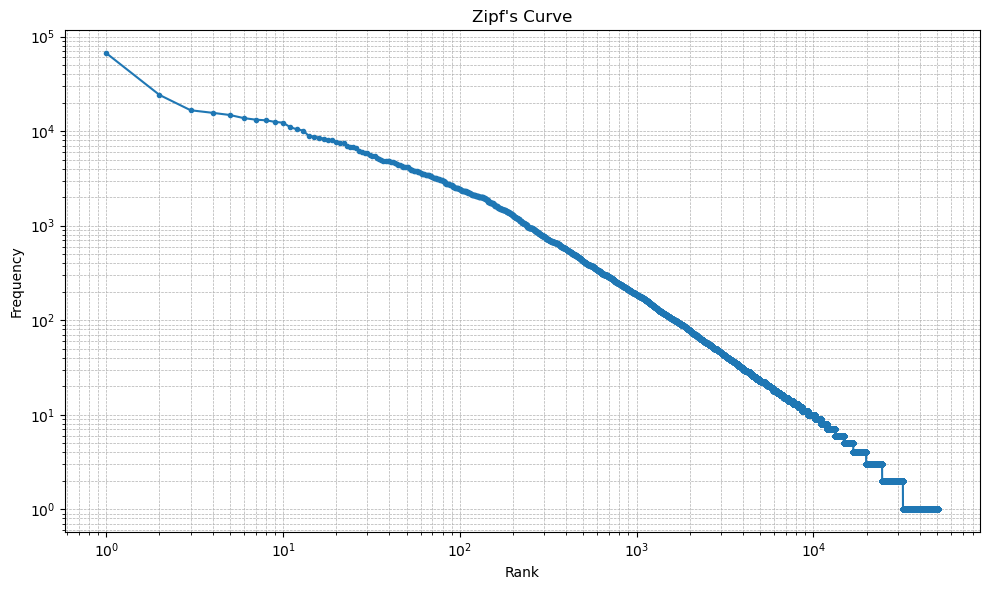

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('punkt')

df=pd.read_excel(r"D:\Merge file.xlsx")

def preprocess_text(text):
    words = word_tokenize(text)
    return words

text_column = df['Comment']
text_column = text_column.apply(lambda x: str(x))

all_words = []

for comment in text_column:
    words = preprocess_text(comment)
    all_words.extend(words)

fdist = FreqDist(all_words)

# Create a list of tuples containing word and its frequency
word_freq_tuples = [(word, freq) for word, freq in fdist.items()]

# Sort the list by frequency in descending order
word_freq_tuples.sort(key=lambda x: x[1], reverse=True)

# Create lists of ranks and frequencies
ranks = list(range(1, len(word_freq_tuples) + 1))
frequencies = [freq for _, freq in word_freq_tuples]

# Create a log-log plot for Zipf's curve
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker='.')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Curve")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


In [1]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
nltk.download('punkt')

df = pd.read_excel('D:\Merge file.xlsx')

text_column = df['Comment']
text_column = text_column.apply(lambda x: str(x))

# Tokenize and preprocess text
def preprocess_text(text):
    words = word_tokenize(text)
    return words

word_lengths = [[] for _ in range(8)]  # Create lists to store words of lengths 0 to 7

for comment in text_column:
    words = preprocess_text(comment)
    for word in words:
        length = len(word)
        if 1 <= length <= 7:  # Only consider words with lengths from 1 to 7
            word_lengths[length].append(word)

top_10_words = [[] for _ in range(8)]  # Create lists to store the top 10 frequent words of lengths 0 to 7

for i in range(1, 8):
    word_freq = nltk.FreqDist(word_lengths[i])
    top_10_words[i] = word_freq.most_common(10)

# Print the top 10 frequent n-letter words for n = 1 to 7
for i in range(1, 8):
    print(f"Top 10 frequent {i}-letter words:")
    for word, freq in top_10_words[i]:
        print(f"{word}: {freq}")
    print()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 frequent 1-letter words:
,: 66690
!: 8867
?: 6197
‡¶ì: 5823
‡¶è: 4359
‡•§: 3546
): 2516
Ô∏è: 1884
.: 1744
(: 1109

Top 10 frequent 2-letter words:
‡¶è‡¶á: 24103
‡¶®‡¶æ: 15586
‡¶ï‡ßá: 13201
‡¶Ü‡¶∞: 12505
‡¶ü‡¶æ: 7560
‡¶ï‡¶ø: 6862
‡¶Ø‡ßá: 5432
‡¶è‡¶∞: 5430
‡¶™‡¶∞: 4668
‡¶Ü‡¶ú: 4187

Top 10 frequent 3-letter words:
‡¶õ‡¶¨‡¶ø: 12996
‡¶Ü‡¶Æ‡¶ø: 12261
‡¶ó‡¶æ‡¶®: 10973
‡¶≠‡¶æ‡¶á: 8530
‡¶ï‡¶∞‡ßá: 8104
‡¶ñ‡ßÅ‡¶¨: 7394
‡¶Ü‡¶≤‡¶Æ: 6910
‡¶Æ‡¶®‡ßá: 6817
‡¶¨‡¶æ‡¶∞: 4863
‡¶¶‡¶ø‡¶®: 4496

Top 10 frequent 4-letter words:
‡¶Ü‡¶Æ‡¶æ‡¶∞: 16603
‡¶Ö‡¶®‡ßá‡¶ï: 14789
‡¶≠‡¶æ‡¶≤‡ßã: 13708
‡¶π‡¶ø‡¶∞‡ßã: 10433
‡¶Æ‡ßÅ‡¶≠‡¶ø: 10121
‡¶è‡¶ï‡¶ü‡¶æ: 8325
‡¶¶‡ßá‡¶ñ‡ßá: 7633
‡¶∏‡¶æ‡¶≤‡ßá: 6619
‡¶•‡ßá‡¶ï‡ßá: 5817
‡¶ú‡¶®‡ßç‡¶Ø: 5619

Top 10 frequent 5-letter words:
‡¶Ö‡¶≠‡¶ø‡¶®‡ßü: 5149
‡¶¶‡ßá‡¶ñ‡¶§‡ßá: 4867
‡¶õ‡¶¨‡¶ø‡¶ü‡¶æ: 4846
‡¶ó‡¶æ‡¶®‡¶ü‡¶æ: 3414
‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ: 3351
‡¶∏‡¶§‡ßç‡¶Ø‡¶ø: 3223
‡¶ö‡ßã‡¶ñ‡ßá‡¶∞: 2896
‡¶Æ‡¶æ‡¶®‡ßÅ‡¶∑: 2749
‡¶¶‡ßá‡¶ñ‡¶õ‡¶ø: 2462
‡¶Ü‡¶≤‡¶Æ‡ßá‡¶∞: 2336

Top 10 frequent 6-letter words:
‡¶

In [2]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
nltk.download('punkt')

df = pd.read_excel('D:\Merge file.xlsx')

text_column = df['Comment']
text_column = text_column.apply(lambda x: str(x))

# Tokenize and preprocess text
def preprocess_text(text):
    words = word_tokenize(text)
    return words

word_lengths = [[] for _ in range(8)]  # Create lists to store words of lengths 0 to 7

for comment in text_column:
    words = preprocess_text(comment)
    for word in words:
        length = len(word)
        if 1 <= length <= 7:  # Only consider words with lengths from 1 to 7
            word_lengths[length].append(word)

top_10_words = [[] for _ in range(8)]  # Create lists to store the top 10 frequent words of lengths 0 to 7

for i in range(1, 8):
    word_freq = nltk.FreqDist(word_lengths[i])
    top_10_words[i] = word_freq.most_common(10)

# Calculate total word count
total_words = sum(len(words) for words in word_lengths[1:8])

# Print the top 10 frequent n-letter words for n = 1 to 7 with their percentages
for i in range(1, 8):
    print(f"Top 10 frequent {i}-letter words:")
    for word, freq in top_10_words[i]:
        percentage = (freq / total_words) * 100
        print(f"{word}: {freq} ({percentage:.2f}%)")
    print()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 frequent 1-letter words:
,: 66690 (4.56%)
!: 8867 (0.61%)
?: 6197 (0.42%)
‡¶ì: 5823 (0.40%)
‡¶è: 4359 (0.30%)
‡•§: 3546 (0.24%)
): 2516 (0.17%)
Ô∏è: 1884 (0.13%)
.: 1744 (0.12%)
(: 1109 (0.08%)

Top 10 frequent 2-letter words:
‡¶è‡¶á: 24103 (1.65%)
‡¶®‡¶æ: 15586 (1.06%)
‡¶ï‡ßá: 13201 (0.90%)
‡¶Ü‡¶∞: 12505 (0.85%)
‡¶ü‡¶æ: 7560 (0.52%)
‡¶ï‡¶ø: 6862 (0.47%)
‡¶Ø‡ßá: 5432 (0.37%)
‡¶è‡¶∞: 5430 (0.37%)
‡¶™‡¶∞: 4668 (0.32%)
‡¶Ü‡¶ú: 4187 (0.29%)

Top 10 frequent 3-letter words:
‡¶õ‡¶¨‡¶ø: 12996 (0.89%)
‡¶Ü‡¶Æ‡¶ø: 12261 (0.84%)
‡¶ó‡¶æ‡¶®: 10973 (0.75%)
‡¶≠‡¶æ‡¶á: 8530 (0.58%)
‡¶ï‡¶∞‡ßá: 8104 (0.55%)
‡¶ñ‡ßÅ‡¶¨: 7394 (0.51%)
‡¶Ü‡¶≤‡¶Æ: 6910 (0.47%)
‡¶Æ‡¶®‡ßá: 6817 (0.47%)
‡¶¨‡¶æ‡¶∞: 4863 (0.33%)
‡¶¶‡¶ø‡¶®: 4496 (0.31%)

Top 10 frequent 4-letter words:
‡¶Ü‡¶Æ‡¶æ‡¶∞: 16603 (1.13%)
‡¶Ö‡¶®‡ßá‡¶ï: 14789 (1.01%)
‡¶≠‡¶æ‡¶≤‡ßã: 13708 (0.94%)
‡¶π‡¶ø‡¶∞‡ßã: 10433 (0.71%)
‡¶Æ‡ßÅ‡¶≠‡¶ø: 10121 (0.69%)
‡¶è‡¶ï‡¶ü‡¶æ: 8325 (0.57%)
‡¶¶‡ßá‡¶ñ‡ßá: 7633 (0.52%)
‡¶∏‡¶æ‡¶≤‡ßá: 6619 (0.45%)
‡¶•‡ßá‡¶ï‡ßá: 5817 (0.

In [3]:
import pandas as pd
import nltk
nltk.download('punkt')

# Load data
df = pd.read_excel('D:\Merge file.xlsx')

# Extract text column
text_column = df['Comment']
text_column = text_column.apply(lambda x: str(x))

# Tokenize text
def preprocess_text(text):
    words = nltk.word_tokenize(text)
    return words

# Initialize a dictionary to store letter frequencies
letter_freq = {}

# Process text
for comment in text_column:
    words = preprocess_text(comment)
    for word in words:
        for letter in word:
            if letter.isalpha():  # Check if the character is a letter
                letter = letter.lower()  # Convert to lowercase for case-insensitive counting
                if letter in letter_freq:
                    letter_freq[letter] += 1
                else:
                    letter_freq[letter] = 1

# Calculate total letter count
total_letters = sum(letter_freq.values())

# Calculate and print the percentage of occurrence of each letter
for letter, freq in letter_freq.items():
    percentage = (freq / total_letters) * 100
    print(f"{letter}: {freq} occurrences ({percentage:.2f}%)")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


‡¶∂: 60044 occurrences (1.51%)
‡¶ñ: 101386 occurrences (2.55%)
‡¶π: 99399 occurrences (2.50%)
‡¶∏: 181783 occurrences (4.58%)
‡¶®: 380707 occurrences (9.58%)
‡¶ï: 262163 occurrences (6.60%)
‡¶¨: 227802 occurrences (5.73%)
‡¶è: 97609 occurrences (2.46%)
‡¶á: 112858 occurrences (2.84%)
‡¶Æ: 254246 occurrences (6.40%)
‡¶¶: 148916 occurrences (3.75%)
‡¶∑: 25213 occurrences (0.63%)
‡¶õ: 112960 occurrences (2.84%)
‡¶≤: 234922 occurrences (5.91%)
‡¶ü: 104091 occurrences (2.62%)
‡¶∞: 421772 occurrences (10.62%)
‡¶£: 15562 occurrences (0.39%)
‡¶™: 106916 occurrences (2.69%)
‡¶Ø: 105381 occurrences (2.65%)
‡¶§: 167495 occurrences (4.22%)
‡¶Ü: 125214 occurrences (3.15%)
‡¶ß: 32383 occurrences (0.82%)
‡ßü: 88458 occurrences (2.23%)
‡¶Ö: 55435 occurrences (1.40%)
‡¶ö: 50488 occurrences (1.27%)
‡¶•: 33673 occurrences (0.85%)
‡ßú: 9973 occurrences (0.25%)
‡¶ó: 85626 occurrences (2.16%)
‡¶ù: 4936 occurrences (0.12%)
‡¶≠: 87251 occurrences (2.20%)
‡¶ú: 75456 occurrences (1.90%)
‡¶´: 13074 occurrences (

In [4]:
import pandas as pd
import nltk
nltk.download('punkt')

# Load data
df = pd.read_excel('D:\Merge file.xlsx')

# Extract text column
text_column = df['Comment']
text_column = text_column.apply(lambda x: str(x))

# Tokenize text
def preprocess_text(text):
    words = nltk.word_tokenize(text)
    return words

# Initialize a dictionary to store letter frequencies
letter_freq = {}

# Process text
for comment in text_column:
    words = preprocess_text(comment)
    for word in words:
        for letter in word:
            if '\u0980' <= letter <= '\u09FF':  # Check if the character is a Bengali letter
                if letter in letter_freq:
                    letter_freq[letter] += 1
                else:
                    letter_freq[letter] = 1

# Calculate total letter count
total_letters = sum(letter_freq.values())

# Calculate and print the percentage of occurrence of each Bengali letter
for letter, freq in letter_freq.items():
    percentage = (freq / total_letters) * 100
    print(f"{letter}: {freq} occurrences ({percentage:.2f}%)")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


‡¶∂: 60044 occurrences (0.95%)
‡ßá: 574442 occurrences (9.10%)
‡¶ñ: 101386 occurrences (1.61%)
‡¶π: 99399 occurrences (1.57%)
‡¶æ: 767818 occurrences (12.16%)
‡¶∏: 181783 occurrences (2.88%)
‡¶ø: 348397 occurrences (5.52%)
‡¶®: 380707 occurrences (6.03%)
‡¶ï: 262163 occurrences (4.15%)
‡¶¨: 227802 occurrences (3.61%)
‡¶è: 97609 occurrences (1.55%)
‡¶á: 112858 occurrences (1.79%)
‡¶Æ: 254246 occurrences (4.03%)
‡¶¶: 148916 occurrences (2.36%)
‡¶∑: 25213 occurrences (0.40%)
‡¶õ: 112960 occurrences (1.79%)
‡¶≤: 234922 occurrences (3.72%)
‡¶ü: 104091 occurrences (1.65%)
‡¶∞: 421772 occurrences (6.68%)
‡ßÅ: 154211 occurrences (2.44%)
‡¶£: 15562 occurrences (0.25%)
‡¶™: 106916 occurrences (1.69%)
‡ßç: 196444 occurrences (3.11%)
‡¶Ø: 105381 occurrences (1.67%)
‡¶§: 167495 occurrences (2.65%)
‡¶Ü: 125214 occurrences (1.98%)
‡¶ß: 32383 occurrences (0.51%)
‡ß©: 6681 occurrences (0.11%)
‡ß¶: 17847 occurrences (0.28%)
‡¶Å: 6211 occurrences (0.10%)
‡ßü: 88458 occurrences (1.40%)
‡¶Ö: 55435 occurren

In [5]:
import pandas as pd
import nltk
nltk.download('punkt')

# Load data
df = pd.read_excel('D:\Merge file.xlsx')

# Extract text column
text_column = df['Comment']
text_column = text_column.apply(lambda x: str(x))

# Tokenize text
def preprocess_text(text):
    words = nltk.word_tokenize(text)
    return words

# Initialize a dictionary to store letter frequencies
letter_freq = {}

# Process text
for comment in text_column:
    words = preprocess_text(comment)
    for word in words:
        for letter in word:
            if '\u0980' <= letter <= '\u09FF':  # Check if the character is a Bengali letter
                if letter in letter_freq:
                    letter_freq[letter] += 1
                else:
                    letter_freq[letter] = 1

# Calculate total letter count
total_letters = sum(letter_freq.values())

# Create a DataFrame for the results
results = {'Letter': [], 'Occurrences': [], 'Percentage': []}
for letter, freq in letter_freq.items():
    percentage = (freq / total_letters) * 100
    results['Letter'].append(letter)
    results['Occurrences'].append(freq)
    results['Percentage'].append(percentage)

# Create a Pandas DataFrame
df_results = pd.DataFrame(results)

# Save the results as an Excel file
output_excel_path = 'Bangla_Letter_Percentage.xlsx'
df_results.to_excel(output_excel_path, index=False)
print(f"Percentage of occurrence of each Bangla letter saved to {output_excel_path}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Percentage of occurrence of each Bangla letter saved to Bangla_Letter_Percentage.xlsx


In [6]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
nltk.download('punkt')

df = pd.read_excel('D:\Merge file.xlsx')

text_column = df['Comment']
text_column = text_column.apply(lambda x: str(x))

# Tokenize and preprocess text
def preprocess_text(text):
    words = word_tokenize(text)
    return words

word_lengths = [[] for _ in range(8)]  # Create lists to store words of lengths 0 to 7

for comment in text_column:
    words = preprocess_text(comment)
    for word in words:
        length = len(word)
        if 1 <= length <= 7:  # Only consider words with lengths from 1 to 7
            word_lengths[length].append(word)

top_10_words = [[] for _ in range(8)]  # Create lists to store the top 10 frequent words of lengths 0 to 7

for i in range(1, 8):
    word_freq = nltk.FreqDist(word_lengths[i])
    top_10_words[i] = word_freq.most_common(10)

# Create a Pandas DataFrame for the results
results = {'Length': [], 'Word': [], 'Frequency': [], 'Percentage': []}
for i in range(1, 8):
    for word, freq in top_10_words[i]:
        percentage = (freq / total_words) * 100
        results['Length'].append(i)
        results['Word'].append(word)
        results['Frequency'].append(freq)
        results['Percentage'].append(percentage)

df_results = pd.DataFrame(results)

# Print the top 10 frequent n-letter words for n = 1 to 7 in a table with percentages
print(df_results)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


    Length     Word  Frequency  Percentage
0        1        ,      66690    4.556451
1        1        !       8867    0.605819
2        1        ?       6197    0.423397
3        1        ‡¶ì       5823    0.397844
4        1        ‡¶è       4359    0.297819
..     ...      ...        ...         ...
65       7  ‡¶¶‡ßá‡¶ñ‡¶≤‡¶æ‡¶Æ‡•§       1176    0.080348
66       7  ‡¶∏‡¶ø‡¶®‡ßá‡¶Æ‡¶æ‡¶∞       1120    0.076522
67       7  ‡¶Ö‡¶≠‡¶ø‡¶®‡ßá‡¶§‡¶æ        938    0.064087
68       7  ‡¶™‡¶∞‡¶ø‡¶ö‡¶æ‡¶≤‡¶ï        922    0.062994
69       7  ‡¶Æ‡¶æ‡¶®‡ßç‡¶®‡¶æ‡¶∞        874    0.059714

[70 rows x 4 columns]


In [1]:
import pandas as pd
import nltk
nltk.download('punkt')

# Load data
df = pd.read_excel('D:\Merge file.xlsx')

# Extract text column
text_column = df['Comment'].astype(str)

# Tokenize text
def tokenize_and_count_bengali_letters(text, letter_freq):
    words = nltk.word_tokenize(text)
    for word in words:
        for letter in word:
            if '\u0980' <= letter <= '\u09FF':  # Check if the character is a Bengali letter
                letter_freq[letter] = letter_freq.get(letter, 0) + 1

# Initialize a dictionary to store letter frequencies
letter_freq = {}

# Process text
text_column.apply(lambda text: tokenize_and_count_bengali_letters(text, letter_freq))

# Calculate total letter count
total_letters = sum(letter_freq.values())

# Create a DataFrame for the results
results = {
    'Letter': list(letter_freq.keys()),
    'Occurrences': list(letter_freq.values()),
    'Percentage': [(freq / total_letters) * 100 for freq in letter_freq.values()]
}

# Create a Pandas DataFrame
df_results = pd.DataFrame(results)

# Save the results as an Excel file
output_excel_path = 'Bangla_Letter_Percentage.xlsx'
df_results.to_excel(output_excel_path, index=False)
print(f"Percentage of occurrence of each Bangla letter saved to {output_excel_path}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Percentage of occurrence of each Bangla letter saved to Bangla_Letter_Percentage.xlsx
